## Exploratory Data Analysis

The data set contains the data regarding several taxi trips and its duration in New York City. We will determine how different variables are dependent on the target variable Trip Duration.

Here is the description of all the variables / features available in the dataset which will help you to perform EDA:

- id - a unique identifier for each trip
- vendor_id - a code indicating the provider associated with the trip record
- pickup_datetime - date and time when the meter was engaged
- dropoff_datetime - date and time when the meter was disengaged
- passenger_count - the number of passengers in the vehicle (driver entered value)
- pickup_longitude - the longitude where the meter was engaged
- pickup_latitude - the latitude where the meter was engaged
- dropoff_longitude - the longitude where the meter was disengaged
- dropoff_latitude - the latitude where the meter was disengaged
- store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
- trip_duration - (target) duration of the trip in seconds

In [67]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [68]:
df = pd.read_csv("Data/nyc_taxi_trip_duration.csv")
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729322 entries, 0 to 729321
Data columns (total 11 columns):
id                    729322 non-null object
vendor_id             729322 non-null int64
pickup_datetime       729322 non-null object
dropoff_datetime      729322 non-null object
passenger_count       729322 non-null int64
pickup_longitude      729322 non-null float64
pickup_latitude       729322 non-null float64
dropoff_longitude     729322 non-null float64
dropoff_latitude      729322 non-null float64
store_and_fwd_flag    729322 non-null object
trip_duration         729322 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 61.2+ MB


In [70]:
df.iloc[1]

id                              id0889885
vendor_id                               1
pickup_datetime       2016-03-11 23:35:37
dropoff_datetime      2016-03-11 23:53:57
passenger_count                         2
pickup_longitude                 -73.9883
pickup_latitude                   40.7317
dropoff_longitude                -73.9948
dropoff_latitude                  40.6949
store_and_fwd_flag                      N
trip_duration                        1100
Name: 1, dtype: object

In [71]:
df.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,729322.000000,7.293220e+05
mean,1.535403,1.662055,-73.973513,40.750919,-73.973422,40.751775,9.522291e+02
std,0.498745,1.312446,0.069754,0.033594,0.069588,0.036037,3.864626e+03
min,1.000000,0.000000,-121.933342,34.712234,-121.933304,32.181141,1.000000e+00
25%,1.000000,1.000000,-73.991859,40.737335,-73.991318,40.735931,3.970000e+02
50%,2.000000,1.000000,-73.981758,40.754070,-73.979759,40.754509,6.630000e+02
75%,2.000000,2.000000,-73.967361,40.768314,-73.963036,40.769741,1.075000e+03
max,2.000000,9.000000,-65.897385,51.881084,-65.897385,43.921028,1.939736e+06


The returned table gives certain insights:
- There are no numerical columns with missing data
- The passenger count varies between 1 and 9 with most people number of people being 1 or 2
- The trip duration varying from 1s to 1939736s~538 hrs. There are definitely some outliers present which must be treated.

* The 2 columns pickup_datetime and dropoff_datetime are now converted to datetime format which makes analysis of date and time data much more easier.

In [72]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime']=pd.to_datetime(df['dropoff_datetime'])

### Target Exploration

Let's visualize the the target variable. 

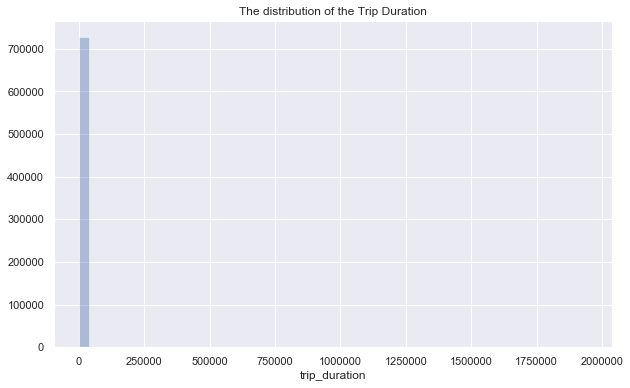

In [100]:
figure,ax=plt.subplots(figsize=(10,6))

sns.distplot(df["trip_duration"], kde=False)
plt.title("The distribution of the Trip Duration") 
plt.show()

* This histogram shows extreme right skewness, hence there are outliers. Lets see the boxplot of this variable.

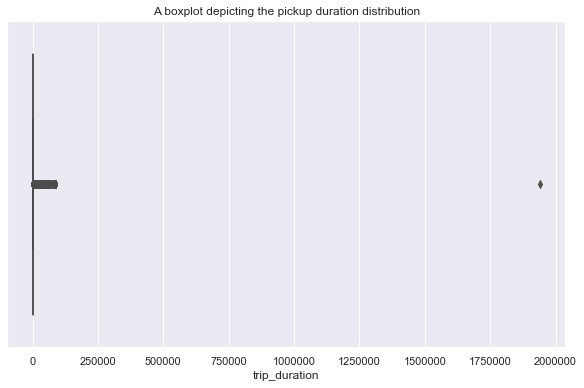

In [101]:
figure,ax=plt.subplots(figsize=(10,6))

sns.boxplot(df['trip_duration'], orient='horizontal')
plt.title('A boxplot depicting the pickup duration distribution')
plt.show()

* Thus we see there is only value near 2000000 while all the others are somewhere between 0 and 100000. The one near 2000000 is definitely an outlier which must be treated.

In [102]:
print( df['trip_duration'].nlargest(10))

21813     1939736
259437      86391
119185      86387
177225      86378
496391      86377
90557       86369
673847      86369
163178      86367
179065      86365
248675      86364
Name: trip_duration, dtype: int64


* The largest value is much greater than the 2nd and 3rd largest trip duration value. This might be because of some errors which typically occurs during data collection or this might be a legit data. Since the occurrence of such a huge value is unlikely so its better to drop this row before further analysis.
The value can be replaced by the mode or median of trip duration as well.

In [104]:
df=df[df.trip_duration!=df.trip_duration.max()]

* Lets have a look at the distribution of the trip_duration after we have dropped the outlier.

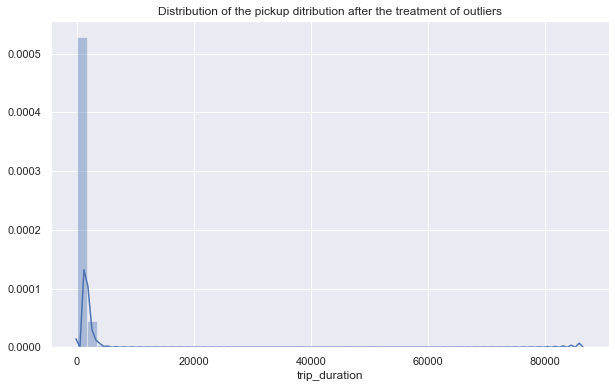

In [107]:
figure,ax=plt.subplots(figsize=(10,6))

sns.distplot(df['trip_duration'])
plt.title('Distribution of the pickup ditribution after the treatment of outliers')
plt.show()

* Still there is an extreme right skewness. Thus we will divide the trip_duration column into some interval.

* The intervals are decided as follows:
- less than 5 hours
- 5–10 hours
- 10–15 hours
- 15–20 hours
- more than 20 hours

In [110]:
bins=np.array([0,1800,3600,5400,7200,90000])
df['duration_time']=pd.cut(df.trip_duration,bins,labels=["< 5", "5-10", "10-15","15-20",">20"])

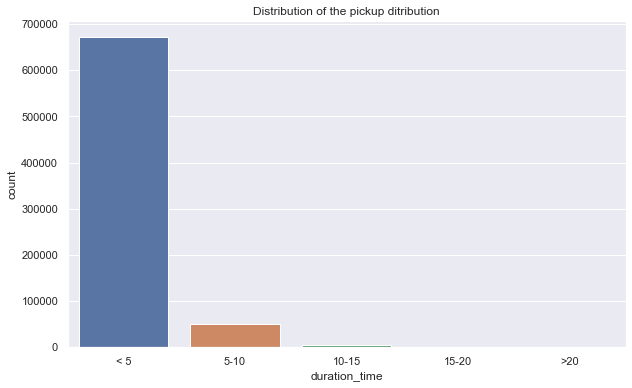

In [112]:
figure,ax=plt.subplots(figsize=(10,6))

sns.countplot(df['duration_time'])
plt.title('Distribution of the pickup ditribution')
plt.show()

* we could also convert columns to log and then check the distributions.

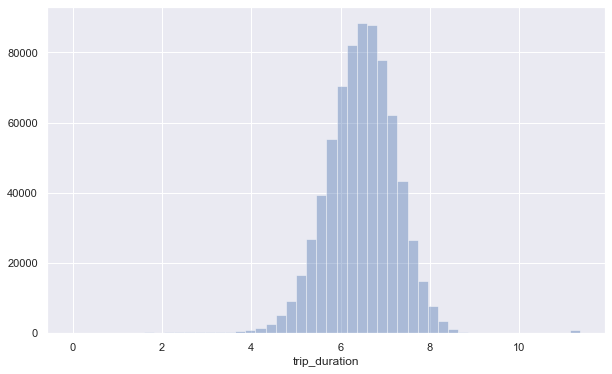

In [113]:
figure,ax=plt.subplots(figsize=(10,6))

sns.distplot(np.log(df["trip_duration"]), kde=False)

plt.show()

* Now, we can see a normal distribution in the plot.

### Univariate Analysis

Lets have a look at the distribution of various variables in the Data set.

#### Passenger Count

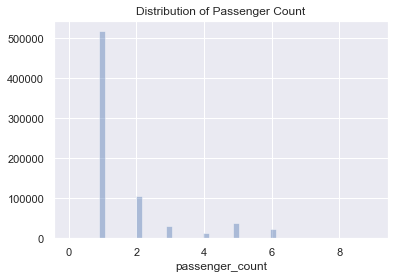

In [75]:
sns.distplot(df['passenger_count'],kde=False)
plt.title('Distribution of Passenger Count')
plt.show()

* Here we see that the mostly 1 or 2 passengers avail the cab. The instance of large group of people travelling together is rare.

#### The distribution of Pickup and Drop Off day of the week

It's better to convert these dates into days of the week so a pattern can be found.

In [76]:
df['pickup_day']=df['pickup_datetime'].dt.day_name()
df['dropoff_day']=df['dropoff_datetime'].dt.day_name()

* Now lets look at the distribution of the different days of week

In [77]:
df['pickup_day'].value_counts()

Friday       111744
Saturday     110252
Thursday     109344
Wednesday    105074
Tuesday      101254
Sunday        97682
Monday        93972
Name: pickup_day, dtype: int64

- Thus we see most trips were taken on Friday and Monday being the least.
- The distribution of trip duration with the days of the week is something to look into as well.

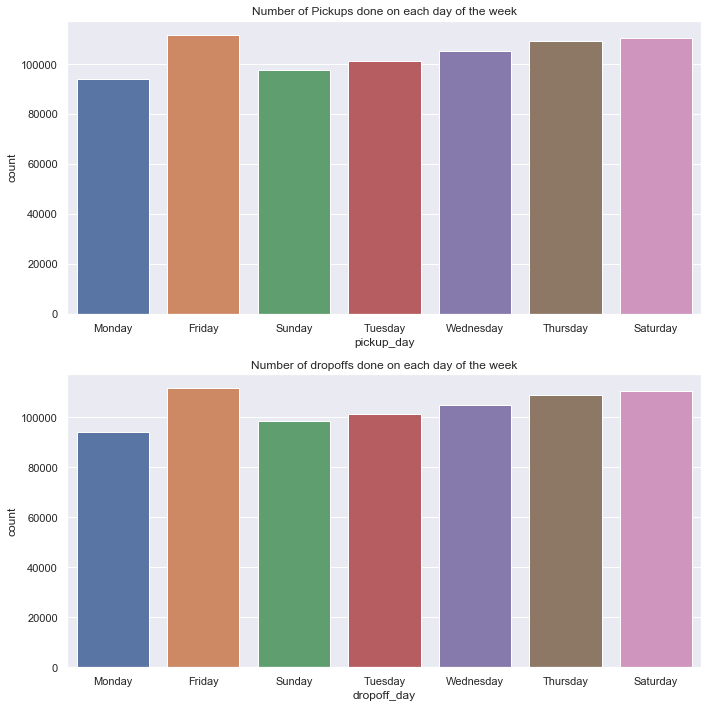

In [78]:
figure,ax=plt.subplots(nrows=2,ncols=1,figsize=(10,10))
sns.countplot(x='pickup_day',data=df,ax=ax[0])
ax[0].set_title('Number of Pickups done on each day of the week')
sns.countplot(x='dropoff_day',data=df,ax=ax[1])
ax[1].set_title('Number of dropoffs done on each day of the week')
plt.tight_layout()

**The distribution of Pickup and Drop Off hours of the day**

- The time part is represented by hours,minutes and seconds which is difficult for the analysis thus we divide the times into 4 time zones:
    - morning (4 hrs to 10 hrs),
    - midday (10 hrs to 16 hrs),
    - evening (16 hrs to 22 hrs),
    - late night (22 hrs to 4 hrs).

In [79]:
import datetime

def timezone(x):
    if x>=datetime.time(4, 0, 1) and x <=datetime.time(10, 0, 0):
        return 'morning'
    elif x>=datetime.time(10, 0, 1) and x <=datetime.time(16, 0, 0):
        return 'midday'
    elif x>=datetime.time(16, 0, 1) and x <=datetime.time(22, 0, 0):
        return 'evening'
    elif x>=datetime.time(22, 0, 1) or x <=datetime.time(4, 0, 0):
        return 'late night'

In [80]:
df['pickup_timezone']=df['pickup_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )
df['dropoff_timezone']=df['dropoff_datetime'].apply(lambda x :timezone(datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").time()) )

In [81]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_timezone,dropoff_timezone
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,Monday,Monday,evening,evening
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,Friday,Friday,late night,late night
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,Sunday,Sunday,evening,evening
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,Tuesday,Tuesday,morning,midday
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,Wednesday,Wednesday,morning,morning


* Lets look at the distribution of the timezones

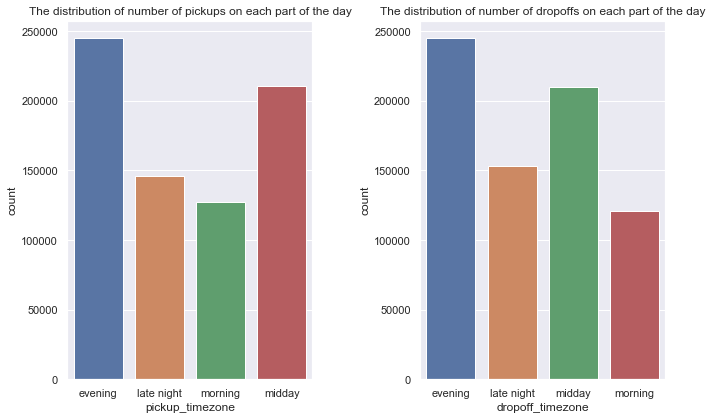

In [82]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))

sns.countplot(x='pickup_timezone',data=df,ax=ax[0])
ax[0].set_title('The distribution of number of pickups on each part of the day')

sns.countplot(x='dropoff_timezone',data=df,ax=ax[1])
ax[1].set_title('The distribution of number of dropoffs on each part of the day')

plt.tight_layout()
plt.show()

* Thus we observe that most pickups and drops occur in the evening. While the least drops and pickups occur during morning.
Lets have another column depicting the hour of the day when the pickup was done.

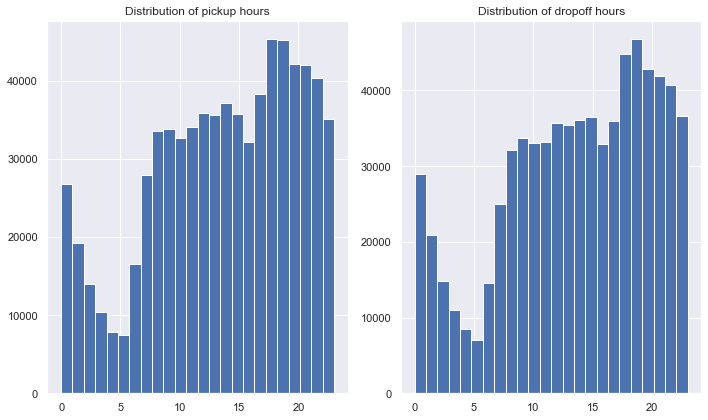

In [83]:
figure,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,6))

df['pickup_hour']=df['pickup_datetime'].dt.hour
df.pickup_hour.hist(bins=24,ax=ax[0])
ax[0].set_title('Distribution of pickup hours')

df['dropoff_hour']=df['dropoff_datetime'].dt.hour
df.dropoff_hour.hist(bins=24,ax=ax[1])
ax[1].set_title('Distribution of dropoff hours')

plt.tight_layout()
plt.show()

* The 2 distributions are almost similar and are also aligned with the division of the hours of the day into 4 parts and their distribution done previously.

#### Distribution of the stored and forward flag

In [88]:
df['store_and_fwd_flag'].value_counts()

N    725282
Y      4040
Name: store_and_fwd_flag, dtype: int64

* The number of N flag is much larger. We can later see whether they have any relation with the duration of the trip.

#### Distribution of pickup longitude

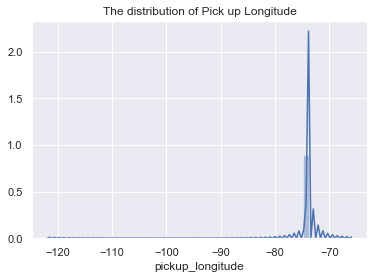

In [116]:
sns.distplot(df['pickup_longitude'])
plt.title('The distribution of Pick up Longitude')
plt.show()

#### Distribution of drop off longitude

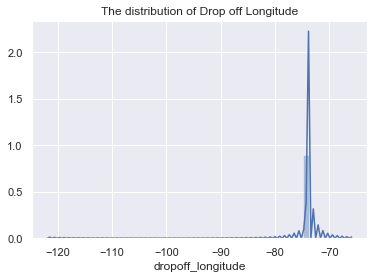

In [120]:
sns.distplot(df["dropoff_longitude"])
plt.title("The distribution of Drop off Longitude")

plt.show()

#### Distribution of dropoff latitude

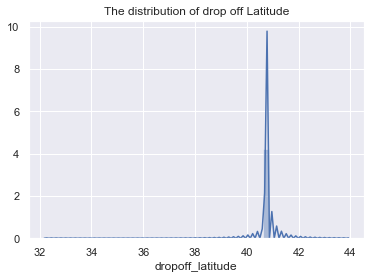

In [122]:
sns.distplot(df['dropoff_latitude'])
plt.title('The distribution of drop off Latitude')
plt.show()

#### Distribution of pickup latitude

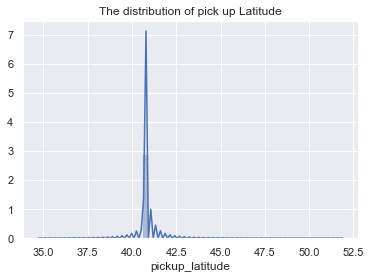

In [124]:
sns.distplot(df['pickup_latitude'])
plt.title('The distribution of pick up Latitude')
plt.show()

We see that the pickup longitude and the dropoff longitude has almost the same kind of distribution while the pickup latitude and the dropoff latitude has slightly different distribution.

#### Distribution of vendor_id

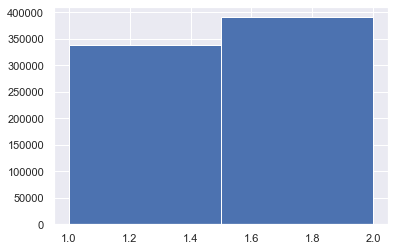

In [129]:
df['vendor_id'].hist(bins=2)
plt.show()

The distribution of vendor id is not much different as expected.

### Bivariate Analysis
Lets now look at the relationship between each of the variables with the target variable trip_duration.
The relationship between Trip Duration and The day of the week

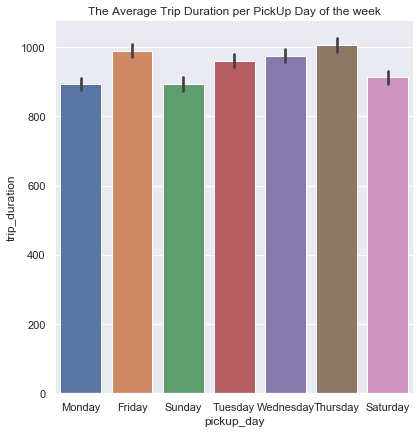

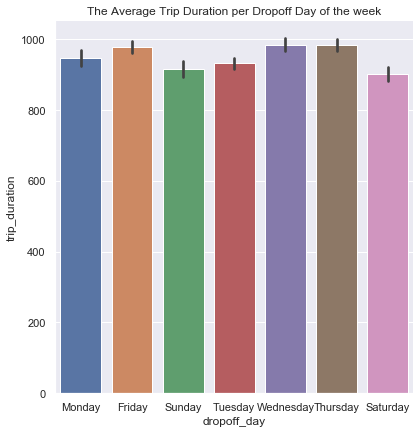

In [133]:
sns.catplot(x="pickup_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per PickUp Day of the week')
sns.catplot(x="dropoff_day",y="trip_duration",kind="bar",data=df,height=6,aspect=1)
plt.title('The Average Trip Duration per Dropoff Day of the week')
plt.show()

- The graphs denote the average estimate of a trip for each day of the week. The error bars provides some indication of the uncertainty around that estimate.
- Thus the highest avg time taken to complete a trip is on Thursday while Monday, Saturday and Sunday takes the least time.
- But this is not enough. We must also take into consideration the percentage of short, medium and long trips taken on each day.

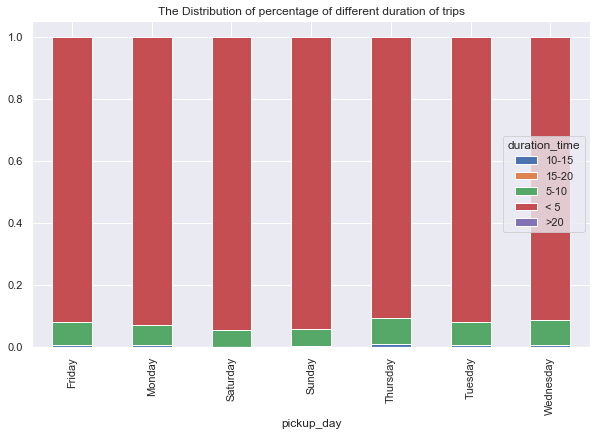

In [136]:
ax=df.groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax1.plot(kind='bar', stacked='True', figsize=(10,6))
plt.title('The Distribution of percentage of different duration of trips')
plt.show()

* The graph shows a percentage distribution of the trips of different duration within each day of the week.
- This does not give much insights as the number of trips within 0–5 hours range is much larger for all the days,
- Lets look at the percentage of only longer trips (with duration time > 5 hours)

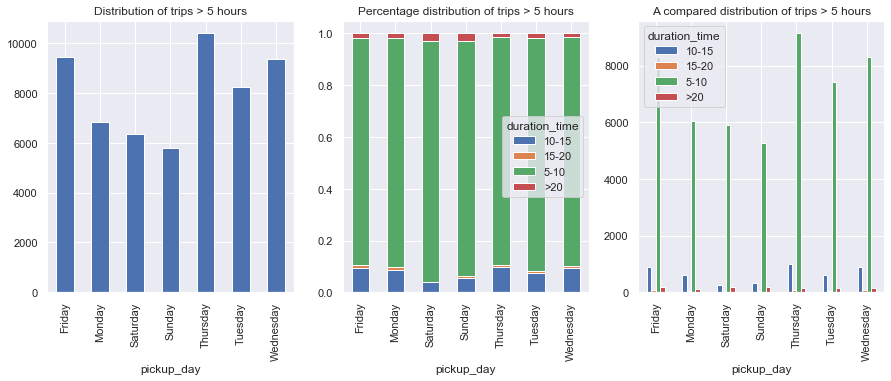

In [138]:
figure,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
ax1=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].count()
ax1.plot(kind='bar',ax=ax[0])
ax[0].set_title('Distribution of trips > 5 hours')

ax2=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts(normalize=True).unstack()
ax2.plot(kind='bar', stacked='True',ax=ax[1])
ax[1].set_title('Percentage distribution of trips > 5 hours')

ax3=df[(df.duration_time !="< 5")].groupby('pickup_day')['duration_time'].value_counts().unstack()
ax3.plot(kind='bar',ax=ax[2])
ax[2].set_title('A compared distribution of trips > 5 hours')

plt.show()

Some key points :
- The most number trips which lasts > 5 hours were taken on Thursday followed by Friday and Wednesday.(Left graph)
- The most number of trips of duration 5–10, 10–15 was taken on Thursday.(right graph)
- But the highest percentage of trips longer than 20 hours was taken on Sunday and Saturday.(middle graph)

### The relationship between Trip Duration and The time of the day

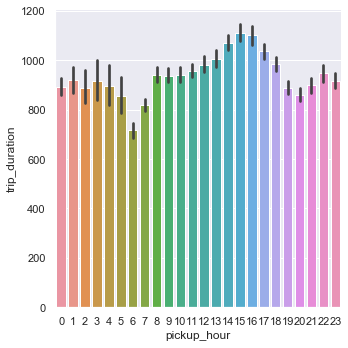

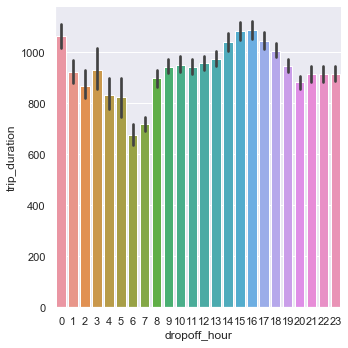

In [158]:

ax1.set_title('Distribution of pickup hours')
ax=sns.catplot(x="pickup_hour", y="trip_duration",kind="bar",data=df,ax=ax1)
ax2.set_title('Distribution of dropoff hours')
ax=sns.catplot(x="dropoff_hour", y="trip_duration",kind="bar",data=df,ax=ax2)
plt.show()

* The highest average time taken to complete a trip are for trips started in midday(between 14 and 17 hours) and the least are the ones taken in the early morning(between 6–7 hours)

### The relationship between passenger count and duration

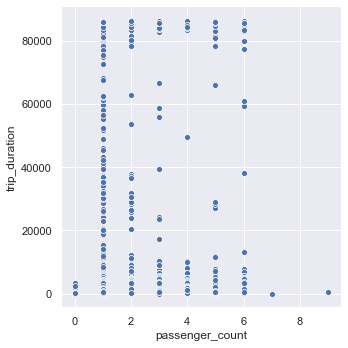

In [159]:
sns.relplot(x="passenger_count", y="trip_duration", data=df, kind="scatter")

- Here we see, passenger count has no such relationship with trip duration. But it is noted that there are no long trips taken by higher passengers counts like 7 or 9. while the trip duration time is more or less evenly distributed only for passenger count 1.

#### The relationship between vendor id and duration

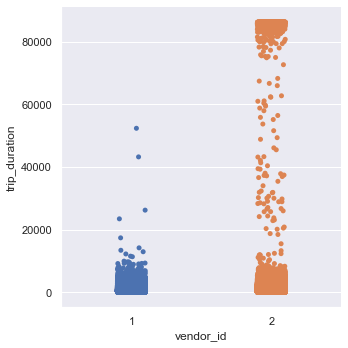

In [161]:
sns.catplot(x="vendor_id", y="trip_duration",kind="strip",data=df)

- Here we see that vendor 1 mostly provides short trip duration cabs while vendor 2 provides cab for both short and long trips

#### The relationship between store forward flag and duration

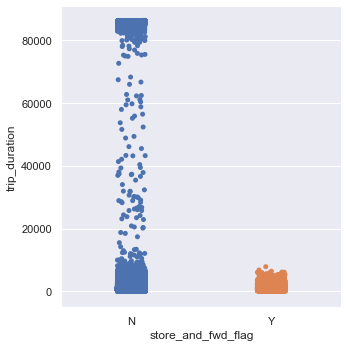

In [163]:
sns.catplot(x="store_and_fwd_flag", y="trip_duration",kind="strip",data=df)

- Thus we see the flag was stored only for short duration trips and for long duration trips the flag was never stored.

#### The relationship between geographical location and duration

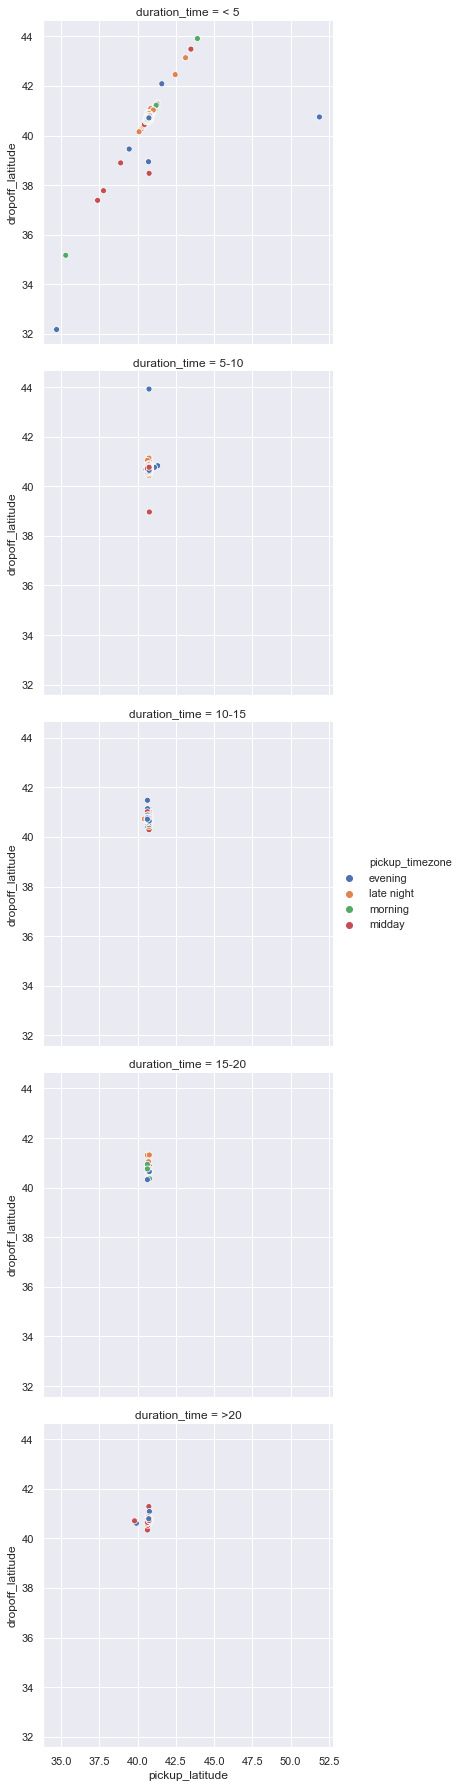

In [167]:
sns.relplot(x="pickup_latitude", y="dropoff_latitude",hue='pickup_timezone',row='duration_time',data=df)

Here’s what we see
- for shorter trips (<5 hours), the pickup and dropoff latitude is more or less evenly distributed between 30 ° and 40 °
- for longer trips(>5 hours ) the pickup and dropoff latitude is all concentrated between 40 ° and 42 ° degrees.

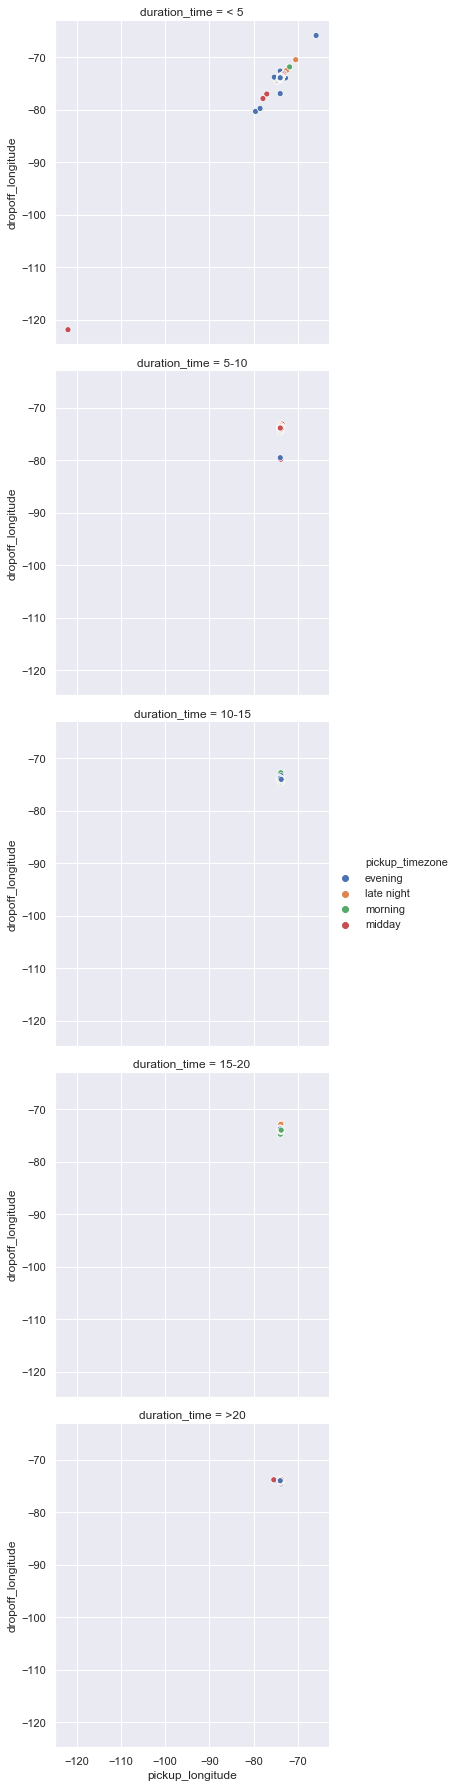

In [170]:
sns.relplot(x="pickup_longitude", y="dropoff_longitude",hue='pickup_timezone',row='duration_time',data=df)

Here’s what we see
- for shorter trips (<5), the pickup and dropoff longitude is more or less evenly distributed between -80 ° and -65 ° with one outlier near -120 ° .
- for longer trips(>5) the pickup and dropoff longitude is all concentrated near -75 °

### Conclusion about Trip Duration and the data set:
- Trip Duration varies a lot ranging from few seconds to more than 20 hours
- Most trips are taken on Friday , Saturday and Thursday
- The average duration of a trip is most on Thursday and Friday as trips longer than 5 hours are mostly taken in these days
- The average duration of trips started in between 14 hours and 17 hours is the largest.
- Vendor 2 mostly provides the longer trips
- The long duration trips(> 5 hours) are mostly concentrated with their pickup region near (40 °,75 °) to (42°,75°)

Source: 
- www.analyticsvidhya.com
- www.medium.com - Exploratory Data Analysis of New York Taxi Trip Duration Dataset using Python